<a href="https://colab.research.google.com/github/itsfaryar/CNN-MNIST-Dataset/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Softmax, BatchNormalization, Dropout, Conv2D, MaxPool2D, Embedding, Reshape, Flatten, LSTM, GRU, SimpleRNN, Concatenate, concatenate, RepeatVector, TimeDistributed, Bidirectional
# from keras.layers.merge import concatenate
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax, Nadam, SGD
from tensorflow.keras import Model
from tensorflow.keras.optimizers.schedules import InverseTimeDecay, ExponentialDecay
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences #from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
import os
import string
from google.colab import drive

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Projects/MNIST'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
y_train_cat = to_categorical(y_train)
y_dev_cat  = to_categorical(y_dev)
y_test_cat  = to_categorical(y_test)
(x_train.shape, y_train_cat.shape), (x_dev.shape, y_dev_cat.shape), (x_test.shape, y_test_cat.shape)

(((48000, 28, 28, 1), (48000, 10)),
 ((12000, 28, 28, 1), (12000, 10)),
 ((10000, 28, 28, 1), (10000, 10)))

In [4]:
input_shape = (28, 28, 1)
input_img = Input(shape=input_shape)

conv1 = Conv2D(32, (3,3), padding='same', activation='relu')(input_img)

#pool1=MaxPool2D((3,3), strides=(1,1), padding='same')(conv1)

conv2 = Conv2D(64, (3,3), padding='same', activation='relu')(conv1)
#conv3 = Conv2D(128, (3,3), padding='same', activation='relu')(conv2)

flat_1 = Flatten()(conv2)

dense = Dense(16, activation='relu')(flat_1)
#dense = Dense(16, activation='relu')(dense)
output = Dense(10, activation='softmax')(dense)
model = Model([input_img], output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 16)                802832    
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 821,818
Trainable params: 821,818
Non-trainable

In [5]:
#model.load_weights("")
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])


In [6]:
# autosave best Model
best_model_file = path + '/model'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [7]:
with tf.device('/GPU:0'):
  history = model.fit(x_train, y_train_cat, batch_size=128, epochs=30, callbacks=[best_model], validation_data=(x_dev, y_dev_cat))  # starts training

Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 0.2764 - accuracy: 0.9189
Epoch 1: val_accuracy improved from -inf to 0.97258, saving model to /content/drive/MyDrive/Projects/MNIST/model


375/375 [==============================] - 17s 22ms/step - loss: 0.2764 - accuracy: 0.9189 - val_loss: 0.0929 - val_accuracy: 0.9726
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 0.0691 - accuracy: 0.9796
Epoch 2: val_accuracy improved from 0.97258 to 0.98108, saving model to /content/drive/MyDrive/Projects/MNIST/model


375/375 [==============================] - 6s 15ms/step - loss: 0.0691 - accuracy: 0.9796 - val_loss: 0.0619 - val_accuracy: 0.9811
Epoch 3/30
373/375 [============================>.] - ETA: 0s - loss: 0.0446 - accuracy: 0.9862
Epoch 3: val_accuracy improved from 0.98108 to 0.98325, saving model to /content/drive/MyDrive/Projects/MNIST/model


375/375 [==============================] - 4s 12ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0574 - val_accuracy: 0.9833
Epoch 4/30
373/375 [============================>.] - ETA: 0s - loss: 0.0311 - accuracy: 0.9903
Epoch 4: val_accuracy improved from 0.98325 to 0.98517, saving model to /content/drive/MyDrive/Projects/MNIST/model


375/375 [==============================] - 5s 13ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0510 - val_accuracy: 0.9852
Epoch 5/30
372/375 [============================>.] - ETA: 0s - loss: 0.0206 - accuracy: 0.9935
Epoch 5: val_accuracy did not improve from 0.98517
375/375 [==============================] - 4s 10ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0568 - val_accuracy: 0.9845
Epoch 6/30
373/375 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9941
Epoch 6: val_accuracy improved from 0.98517 to 0.98575, saving model to /content/drive/MyDrive/Projects/MNIST/model


375/375 [==============================] - 4s 11ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0554 - val_accuracy: 0.9858
Epoch 7/30
373/375 [============================>.] - ETA: 0s - loss: 0.0155 - accuracy: 0.9948
Epoch 7: val_accuracy did not improve from 0.98575
375/375 [==============================] - 3s 9ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0607 - val_accuracy: 0.9853
Epoch 8/30
369/375 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9974
Epoch 8: val_accuracy improved from 0.98575 to 0.98633, saving model to /content/drive/MyDrive/Projects/MNIST/model


375/375 [==============================] - 5s 13ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0651 - val_accuracy: 0.9863
Epoch 9/30
374/375 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9968
Epoch 9: val_accuracy did not improve from 0.98633
375/375 [==============================] - 3s 9ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0652 - val_accuracy: 0.9859
Epoch 10/30
375/375 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9974
Epoch 10: val_accuracy did not improve from 0.98633
375/375 [==============================] - 4s 10ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0644 - val_accuracy: 0.9860
Epoch 11/30
374/375 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9980
Epoch 11: val_accuracy improved from 0.98633 to 0.98700, saving model to /content/drive/MyDrive/Projects/MNIST/model


375/375 [==============================] - 5s 13ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0632 - val_accuracy: 0.9870
Epoch 12/30
370/375 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.9976
Epoch 12: val_accuracy did not improve from 0.98700
375/375 [==============================] - 3s 9ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0740 - val_accuracy: 0.9857
Epoch 13/30
371/375 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9987
Epoch 13: val_accuracy improved from 0.98700 to 0.98792, saving model to /content/drive/MyDrive/Projects/MNIST/model


375/375 [==============================] - 4s 11ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0649 - val_accuracy: 0.9879
Epoch 14/30
372/375 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9978
Epoch 14: val_accuracy did not improve from 0.98792
375/375 [==============================] - 4s 10ms/step - loss: 0.0057 - accuracy: 0.9979 - val_loss: 0.0785 - val_accuracy: 0.9868
Epoch 15/30
369/375 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9986
Epoch 15: val_accuracy did not improve from 0.98792
375/375 [==============================] - 4s 10ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0673 - val_accuracy: 0.9874
Epoch 16/30
369/375 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9988
Epoch 16: val_accuracy improved from 0.98792 to 0.98825, saving model to /content/drive/MyDrive/Projects/MNIST/model


375/375 [==============================] - 4s 12ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0714 - val_accuracy: 0.9883
Epoch 17/30
371/375 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9987
Epoch 17: val_accuracy did not improve from 0.98825
375/375 [==============================] - 3s 9ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0929 - val_accuracy: 0.9858
Epoch 18/30
371/375 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9990
Epoch 18: val_accuracy did not improve from 0.98825
375/375 [==============================] - 4s 10ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0799 - val_accuracy: 0.9868
Epoch 19/30
369/375 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984
Epoch 19: val_accuracy did not improve from 0.98825
375/375 [==============================] - 4s 10ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0769 - val_accuracy: 0.9865
Epoch 20/30
374/375 [=====

In [12]:
model.load_weights(best_model_file)

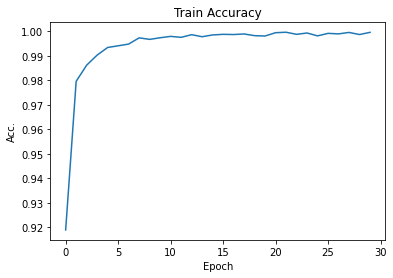

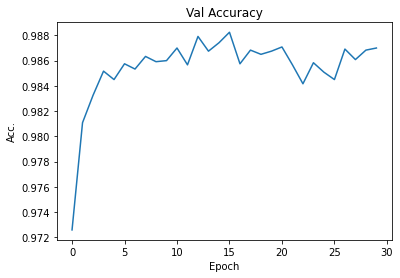

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc.')
plt.show()


plt.plot(history.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc.')
plt.show()


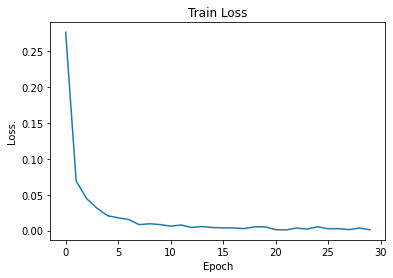

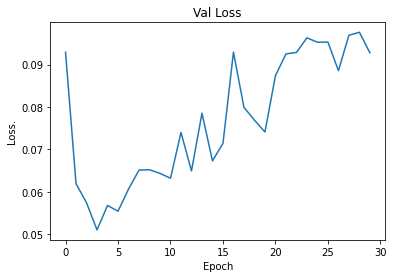

In [14]:
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss.')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss.')
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.0657 - accuracy: 0.9851
Accuracy of train set: 98.51
313/313 [==============================] - 1s 2ms/step
(10000, 1)


Train Predict Report===============

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



Train Cunfusion 

<AxesSubplot:>

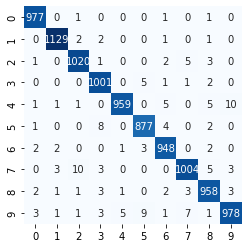

In [15]:
_, acc = model.evaluate(x_test,y_test_cat)
print('Accuracy of train set: %.2f' % (acc*100))
y_predict = model.predict(x_test)
y_p=np.argmax(y_predict, axis=1).reshape(y_test.shape[0],1)
print(y_p.shape)
print('\n\nTrain Predict Report===============\n')
print(classification_report(y_test,y_p))
print('\n\nTrain Cunfusion Matrix===============\n')
matrix_confusion=(confusion_matrix(y_test,y_p))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

